<a href="https://colab.research.google.com/github/sofiavillegas07/Anal-tica/blob/main/Reto_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


0. Cargar librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Prestamo interbibliotecario
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

1. Se cargan los archivos

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Esta es la matriz de correlacion:
           Enroll       Age    Income     Hours
Enroll  1.000000  0.644033  0.476372 -0.048184
Age     0.644033  1.000000  0.450562 -0.040133
Income  0.476372  0.450562  1.000000 -0.018196
Hours  -0.048184 -0.040133 -0.018196  1.000000


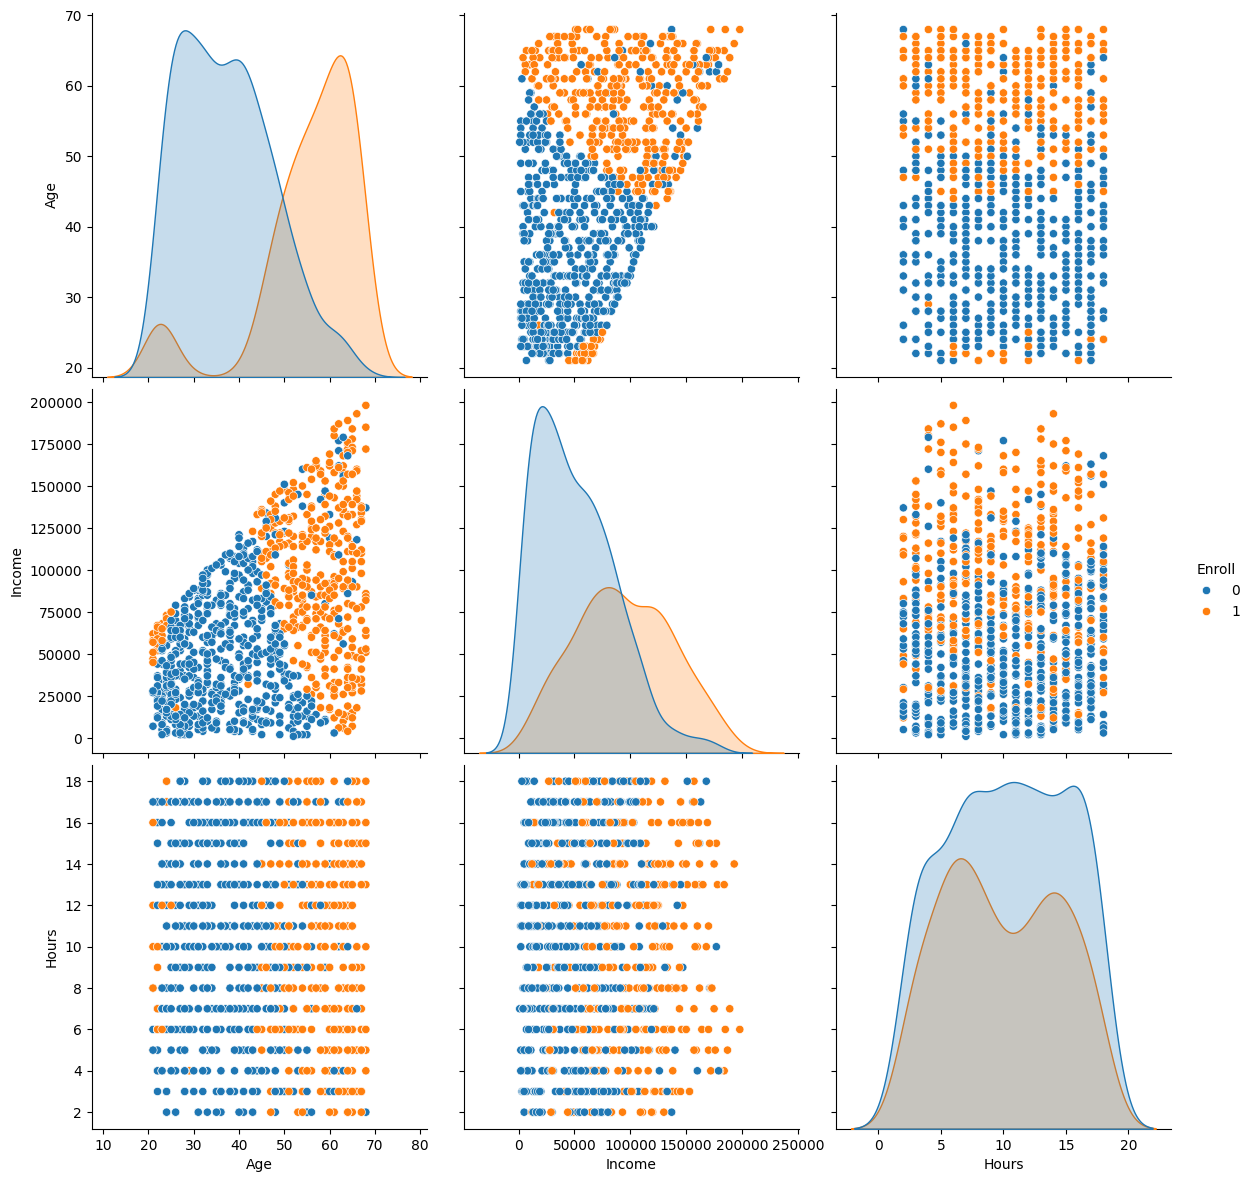

In [ ]:
nxl='/content/drive/MyDrive/Analitica de negocios /3. BD1-GymData_Int.xlsx'
XDB=pd.read_excel(nxl,sheet_name=0)
XDB=XDB.dropna()
XDB.head(100)

XDB=XDB[['Enroll','Age','Income','Hours']]
sns.pairplot(XDB,hue='Enroll',size=4,vars=['Age','Income','Hours'])

corr = XDB.corr()
print("Esta es la matriz de correlacion:\n",corr)

XD=np.array(XDB.iloc[:,0:3])
yd=np.array(XDB.iloc[:,1])

2. Implementamos el modelo KNN

Esta es la matriz de confusión:
 [[ 9  1  0 ...  0  0  0]
 [ 0 19  0 ...  0  0  0]
 [ 2  5 14 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  2  0]
 [ 0  0  0 ...  0  0  2]]
Exactitud: 0.9655172413793104
Sensibilidad: 1.0
Especificidad: 0.9
Esta es la predicción [23]


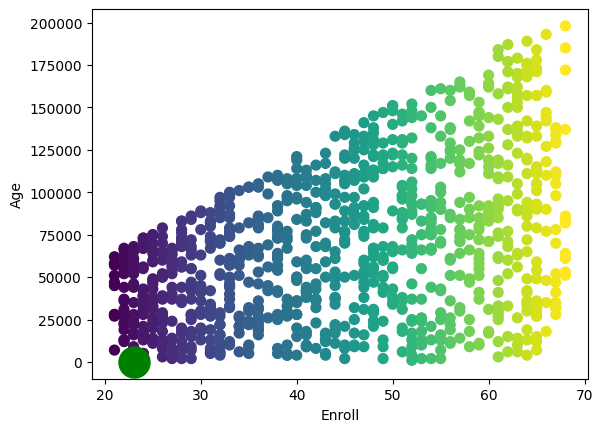

In [ ]:
mknn=KNeighborsClassifier(n_neighbors=3) #Tomar 20 vecinos
mknn.fit(XD,yd) #Se ajusta el modelo

#Evaluamos el funcionamiento del modelo
ydp=mknn.predict(XD)

#Matriz de confusion
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(yd,ydp)
print("Esta es la matriz de confusión:\n",cm)

VN=cm[0,0];FP=cm[0,1];FN=cm[1,0];VP=cm[1,1]
Exac=(VP+VN)/(VP+VN+FP+FN)
Sen=VP/(VP+FN)
Esp=VN/(VN+FP)
print("Exactitud:",Exac)
print("Sensibilidad:",Sen)
print("Especificidad:",Esp)

#Prediccion
XDP=np.array([[28,23,31]])
ydpp=mknn.predict(XDP)
print("Esta es la predicción",ydpp)

#Las graficas siempre se hacen las variables que tienen mas correlacion
plt.scatter(XD[:,1],XD[:,2],c=yd,s=50,cmap='viridis')
plt.scatter(XDP[:,1],XDP[:,2],marker='o',s=500,facecolors='green')
plt.xlabel('Enroll');plt.ylabel('Age')
plt.show()

3. Se procede con la construccion del K-means (montoncitos de Datos-Clusters)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Donde quedo el primer solicitante 3
Donde quedo el segundo solicitante 3
Donde quedo el tercer solicitante 1


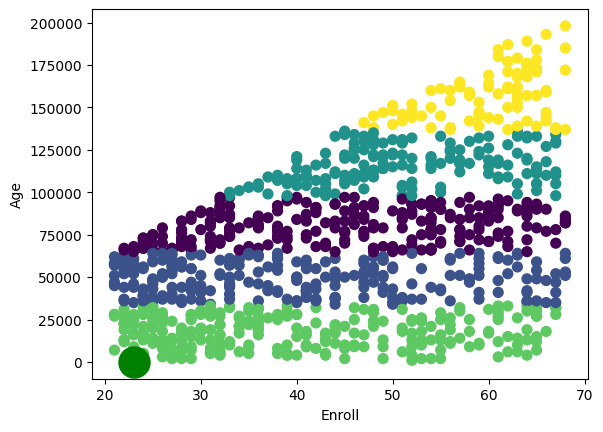

Esta es la predicción [23]


ZeroDivisionError: division by zero

In [ ]:
np.random.seed(42) #Para que ha todos nos de el mismo modelo

mkm=KMeans(n_clusters=5,init='random',random_state=42)
mkm.fit(XD,yd)
labels=mkm.labels_
print("Donde quedo el primer solicitante",labels[0,])
print("Donde quedo el segundo solicitante",labels[1,])
print("Donde quedo el tercer solicitante",labels[2,])

#Se mapean los clusters
plt.scatter(XD[:,1],XD[:,2],c=labels,s=50,cmap='viridis')
plt.scatter(XDP[:,1],XDP[:,2],marker='o',s=500,facecolors='green')
plt.xlabel('Enroll');plt.ylabel('Age')
plt.show()

#Donde quede yo?
XDP=np.array([[28,23,31]])
ydpp=mknn.predict(XDP)
print("Esta es la predicción",ydpp)


# Cal es el porcentaje en el cluster 0
c00 = len(np.where((labels == 0) & (yd == 0))[0])
c01 = len(np.where((labels == 0) & (yd == 1))[0])
print('El porcentaje de negados para el cluster 0 es:', c00 / (c00 + c01))
print('El porcentaje de aprobados para el cluster 0 es:', c01 / (c00 + c01))


# Cual es el porcentaje en el cluster 1
c10 = len(np.where((labels == 1) & (yd == 0))[0])
c11 = len(np.where((labels == 1) & (yd == 1))[0])
print('El porcentaje de negados para el cluster 1 es:', c10 / (c10 + c11))
print('El porcentaje de aprobados para el cluster 1 es:', c11 / (c10 + c11))


# Porcentajes en el cluster 2
c20 = len(np.where((labels == 2) & (yd == 0))[0])
c21 = len(np.where((labels == 2) & (yd == 1))[0])
print('El porcentaje de negados para el cluster 2 es:', c20 / (c20 + c21))
print('El porcentaje de aprobados para el cluster 2 es:', c21 / (c20 + c21))


# Porcentajes en el cluster 3
c30 = len(np.where((labels == 3) & (yd == 0))[0])
c31 = len(np.where((labels == 3) & (yd == 1))[0])
print('El porcentaje de negados para el cluster 3 es:', c30 / (c30 + c31))
print('El porcentaje de aprobados para el cluster 3 es:', c31 / (c30 + c31))


# Porcentajes en el cluster 4
c40 = len(np.where((labels == 4) & (yd == 0))[0])
c41 = len(np.where((labels == 4) & (yd == 1))[0])
print('El porcentaje de negados para el cluster 4 es:', c40 / (c40 + c41))
print('El porcentaje de aprobados para el cluster 4 es:', c41 / (c40 + c41))

#Cual es el porcentaje de preaprobados y negados del cluster 2
c20=len(np.where((labels==2) & (yd==0))[0])
c21=len(np.where((labels==2) & (yd==1))[0])
print("El numero de negados para el cluster 2 es:",c20/(c20+c21))
print("El numero de          para el cluster 2 es:",c21/(c20+c21))

c50=len(np.where((labels==4) & (yd==0))[0])
c51=len(np.where((labels==4) & (yd==1))[0])
print("El numero de negados para el cluster 2 es:",c50/(c50+c51))
print("El numero de preaprobados para el cluster 2 es:",c51/(c50+c51))

#Cual es la caracteristica sociodemografica de cada cluster
clusters=mkm.cluster_centers_
print("Las caracteristicas sociodemograficas de cada cluster son :\n",clusters)